In [1]:
import os,sys
ruta_libs = os.path.abspath("libs")
if ruta_libs not in sys.path:
    sys.path.append(ruta_libs)
    
from helpLibs import *
from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))
import numpy as np
# --- NÚMEROS CON TUS DATOS ---
D = 3.8
A = np.pi * (D/2)**2
m_full_water_kg = 95600
m_empty_kg = 26490
h_bed = 4.83  
void_fraction=0.4

Volume = (m_full_water_kg - m_empty_kg)/1000                  # 69.11 m3
h_all= Volume / A                                                 # 6.09
Vg=(h_all-h_bed)*A+h_bed*A*void_fraction 

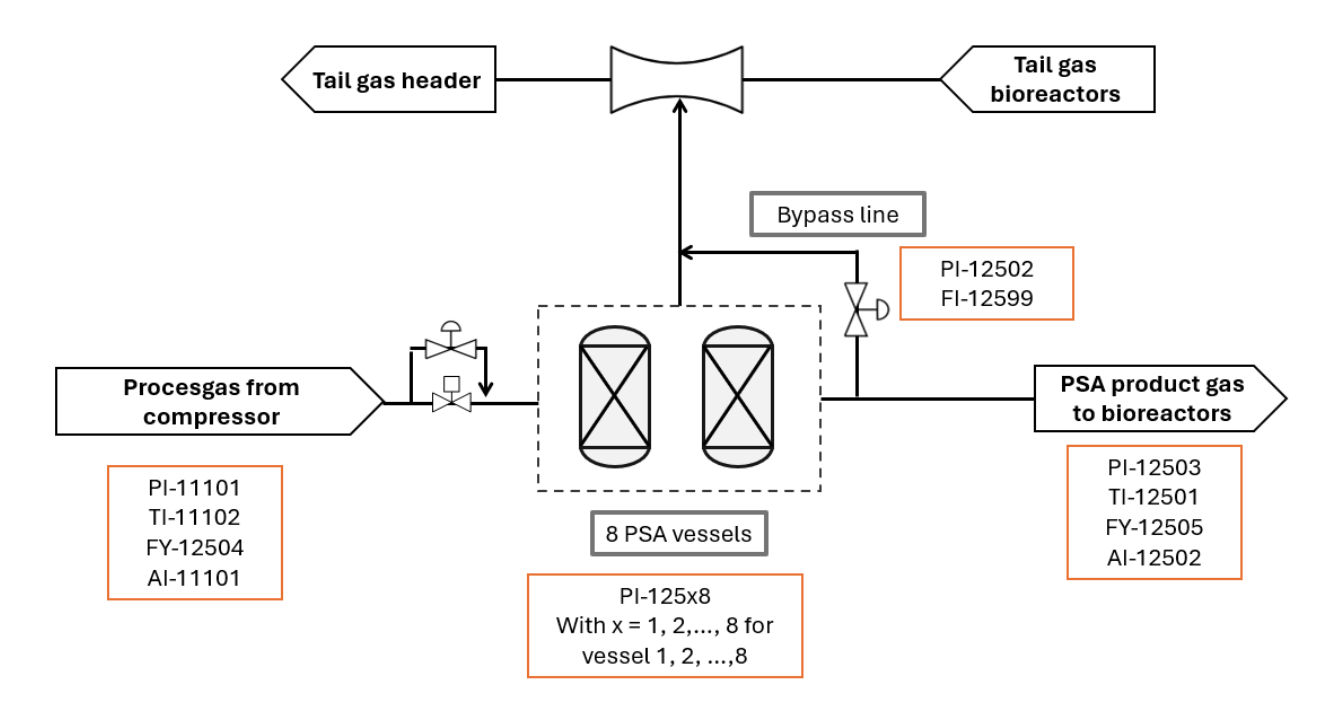

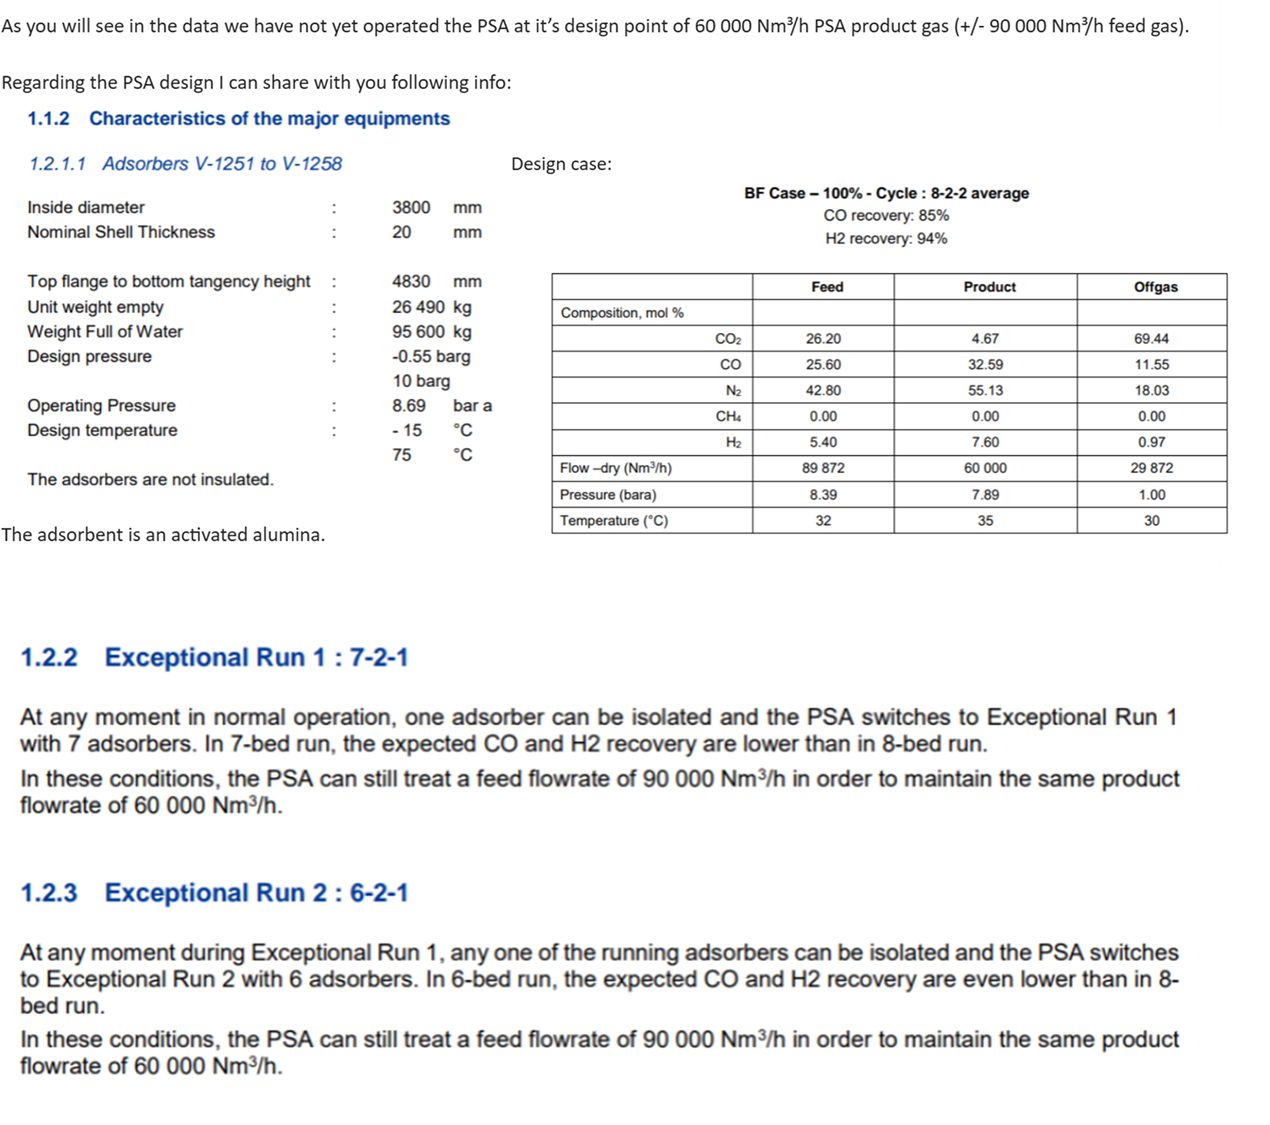

In [2]:
DATA_PATH = r"C:\Users\MiguelCamaraSanz\OneDrive - Fundacion CIRCE\Escritorio\github\ProSimNet\validacion\psa_data.csv" 
t0 = "2025-04-10 00:00:01"   
t1 = "2025-06-20 23:59:59" 
df, meta =getPSAdata(DATA_PATH,t0,t1)

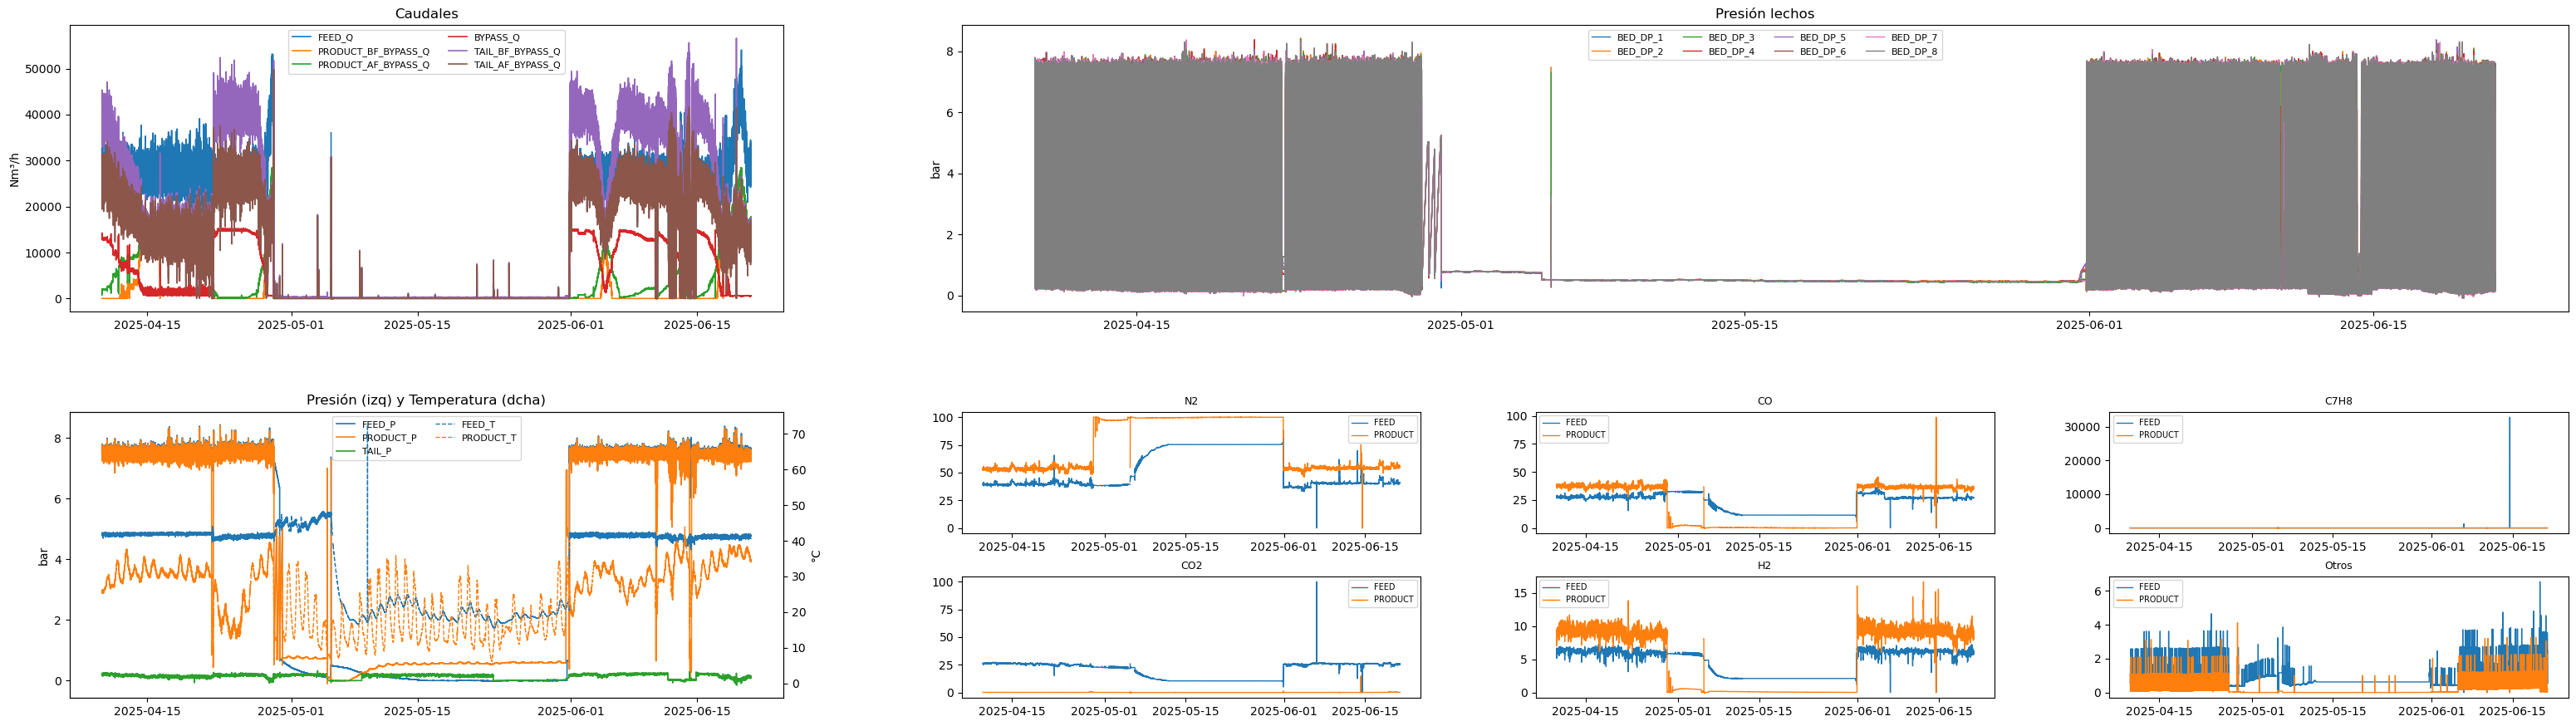

In [3]:
monitorData(df,t0,t1)

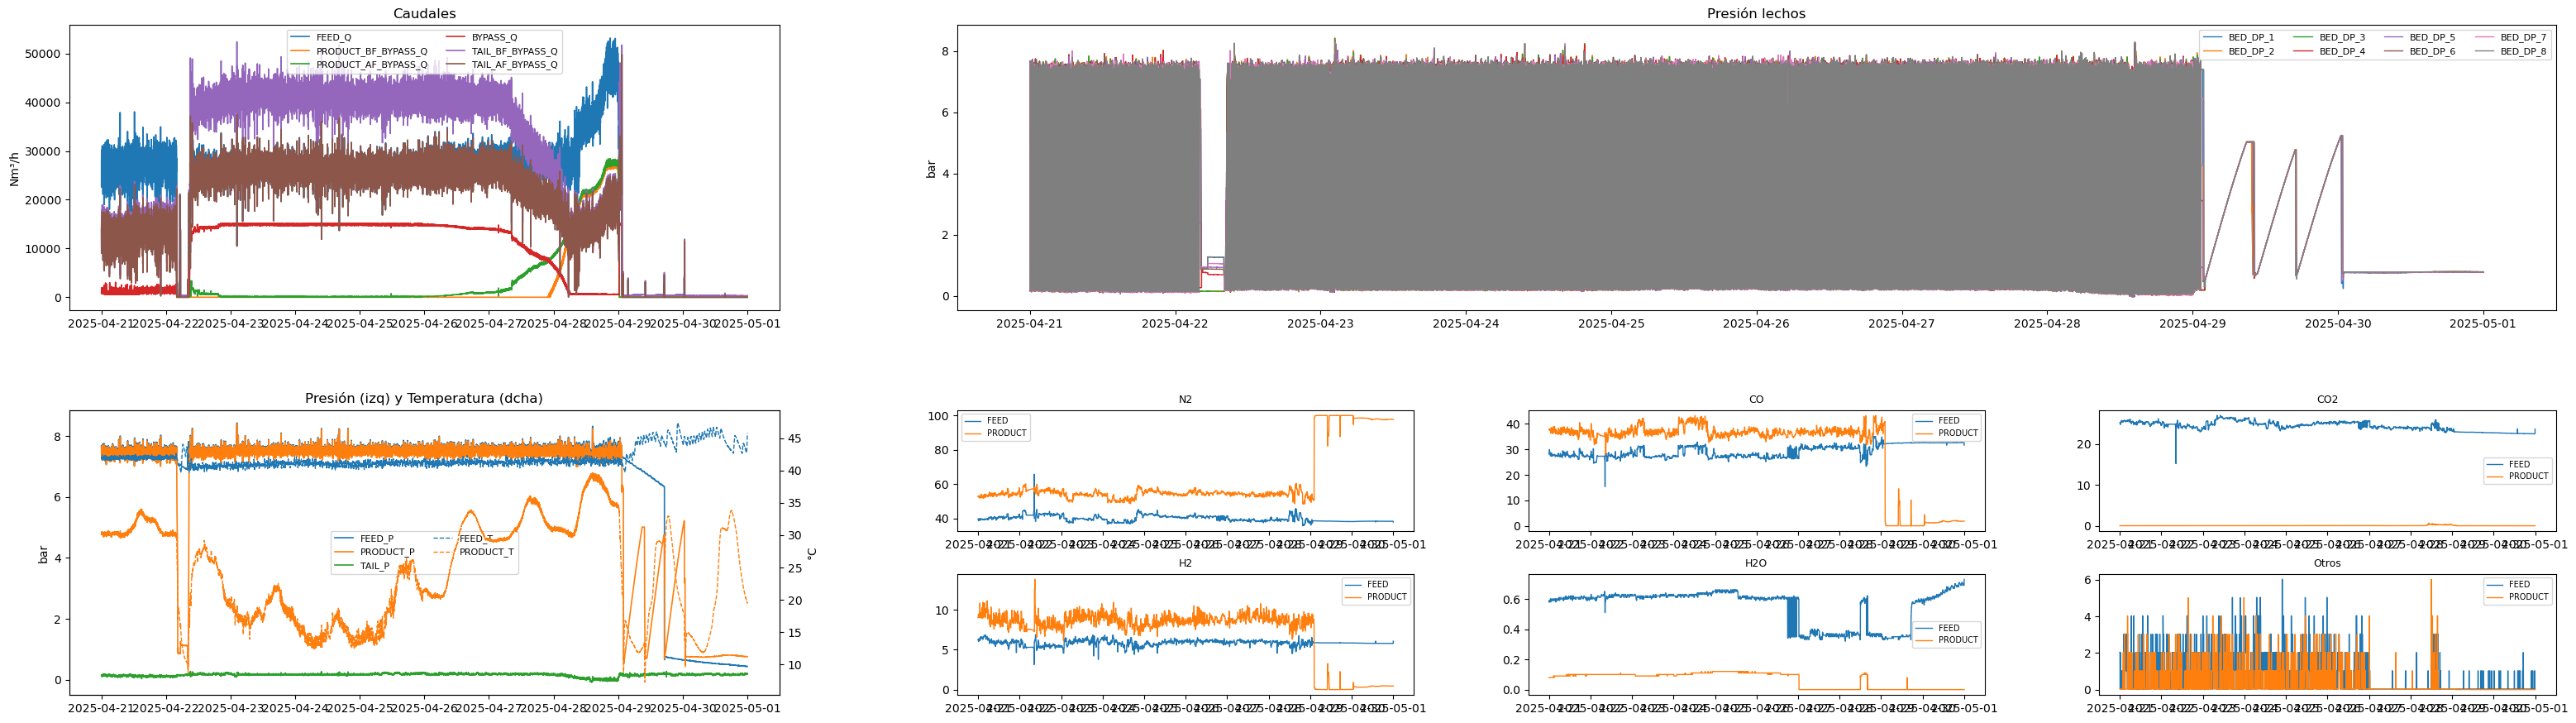

In [4]:
t0 = "2025-04-21 00:00:01"   
t1 = "2025-04-30 23:59:59"  
monitorData(df,t0,t1)

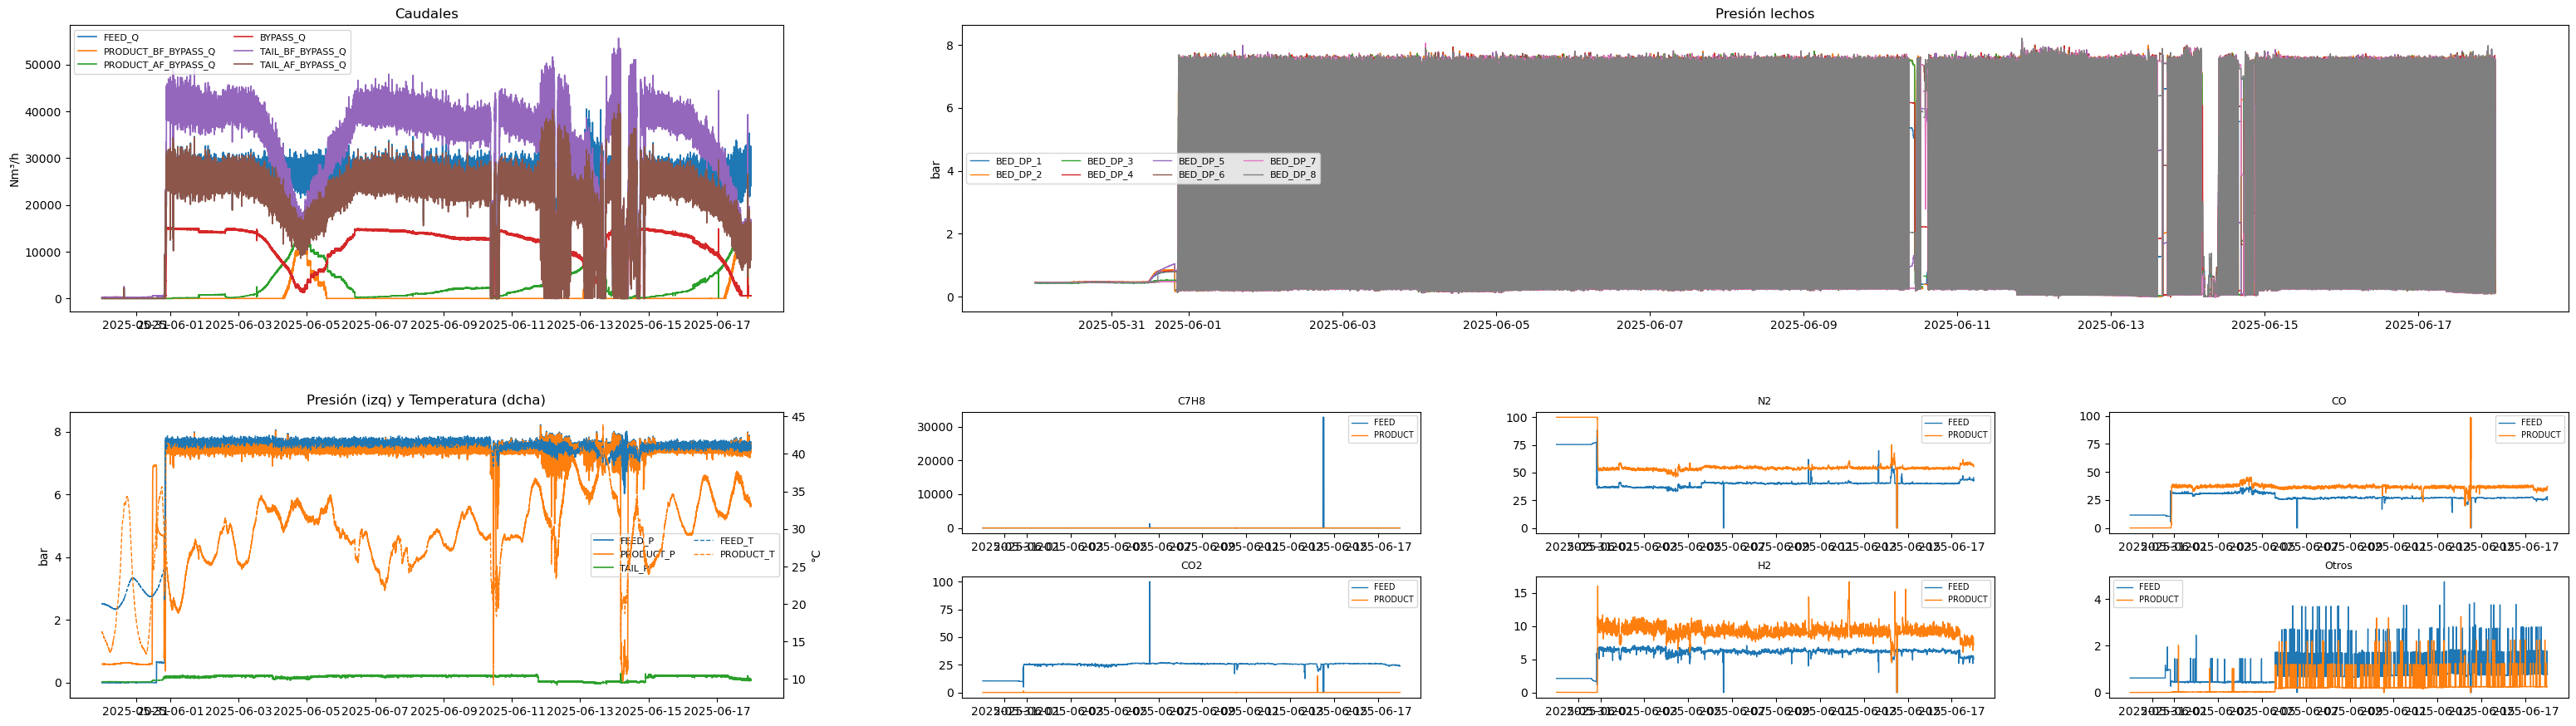

In [5]:
t0 = "2025-05-30 00:00:01"   
t1 = "2025-06-17 23:59:59"  
monitorData(df,t0,t1)

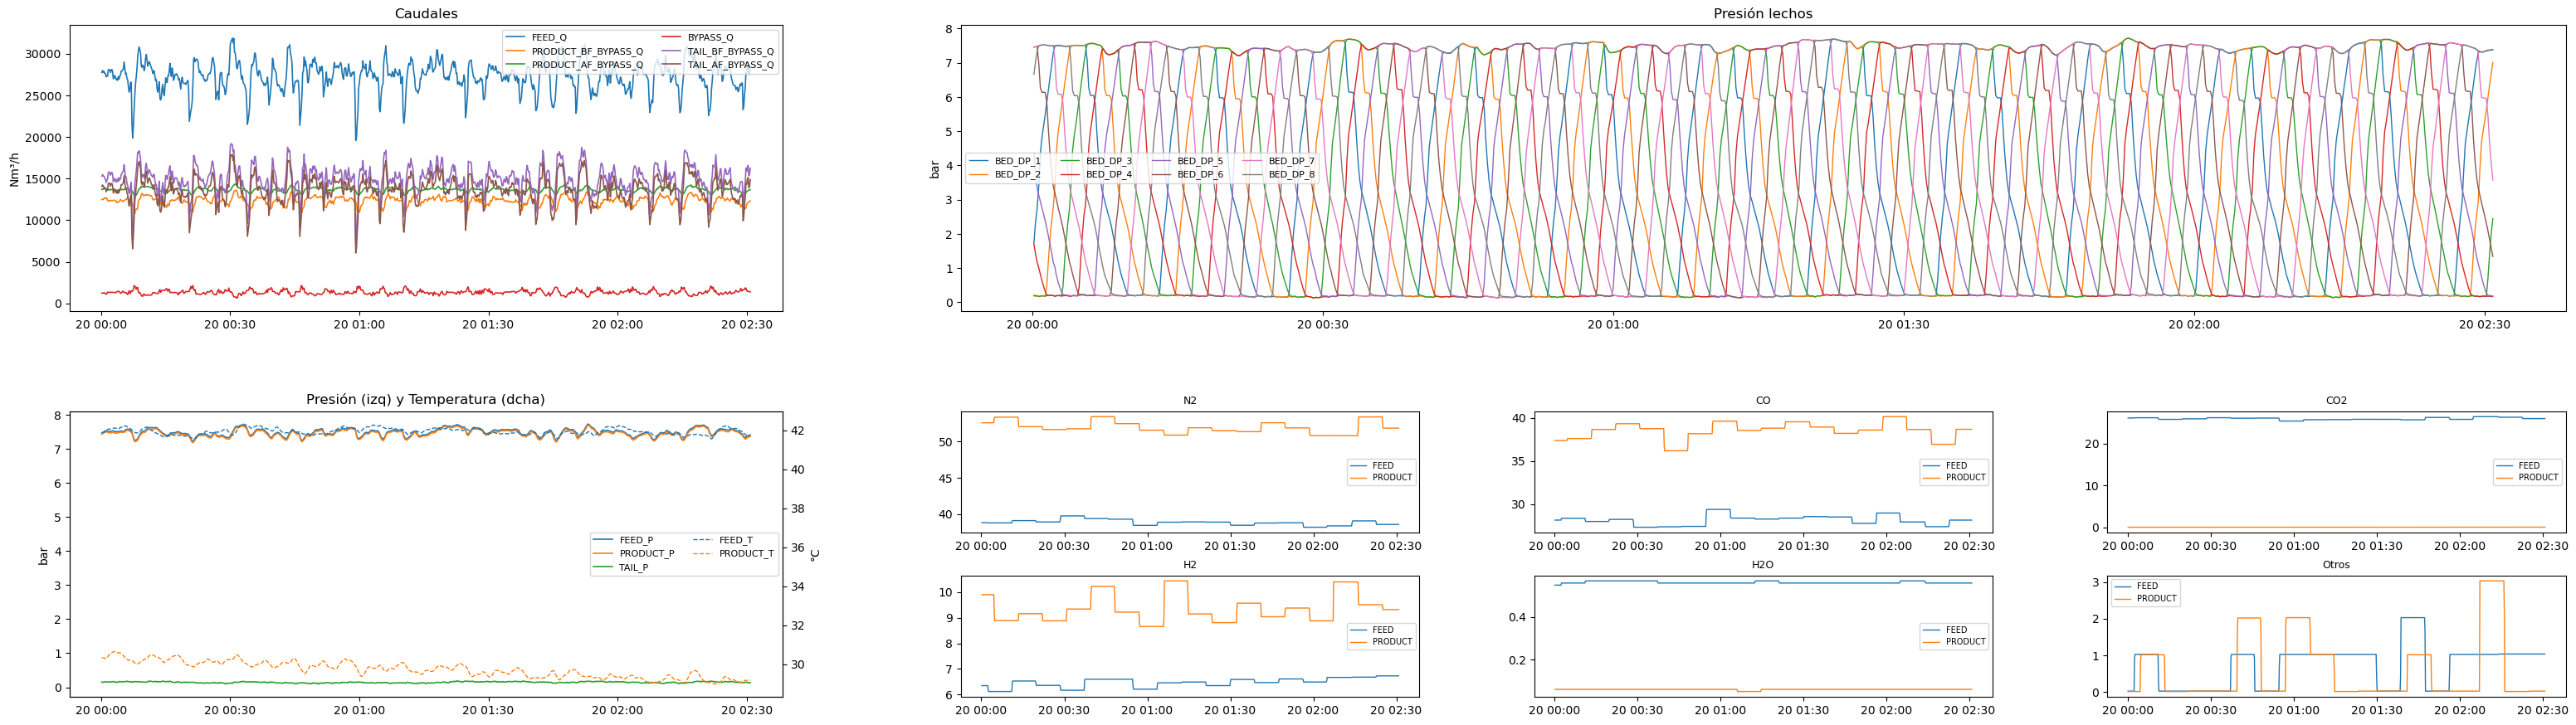

In [6]:
t0 = "2025-04-20 00:00:01"   
t1 = "2025-04-20 02:30:59"  
monitorData(df,t0,t1)

In [7]:
t0 = "2025-04-20 00:00:01"   
t1 = "2025-04-20 23:59:59"  
result = compute_cycle_times(df, start=t0, end=t1, anchor_bed="b1", decimals=2)
print("Ancla temporal:", result["anchor_time"])
result["summary_steps"]

Ancla temporal: 2025-04-20 00:13:10


bed  cycle_min  PRZ_min  FEED_min  BWD_min  PURGE_min  WAIT_min  cycle_count
0  b1      13.37     2.61      3.19     3.85       3.28      0.45          106
1  b2      13.25     2.60      3.15     3.82       3.24      0.44          107
2  b3      13.37     2.61      3.20     3.86       3.26      0.45          106
3  b4      13.37     2.61      3.20     3.85       3.28      0.43          106
4  b5      13.37     2.62      3.19     3.84       3.30      0.44          106
5  b6      13.37     2.61      3.16     3.87       3.30      0.43          106
6  b7      13.37     2.63      3.17     3.85       3.29      0.43          105
7  b8      13.37     2.60      3.20     3.90       3.24      0.43          105

In [8]:
result["summary_substeps"]

bed  PRZ_1_min  PRZ_2_min  PRZ_FEED_min  BWD_1_min  BWD_2_min  \
0  b1       0.79       0.60          1.21       0.45       0.90   
1  b2       0.77       0.54          1.28       0.44       1.04   
2  b3       0.78       0.51          1.31       0.44       0.89   
3  b4       0.78       0.48          1.35       0.45       0.90   
4  b5       0.73       0.59          1.29       0.44       0.94   
5  b6       0.73       0.57          1.30       0.44       0.96   
6  b7       0.76       0.64          1.23       0.44       0.89   
7  b8       0.80       0.48          1.32       0.45       0.87   

   BWD_PURGE_min  cycle_count  
0           2.50          106  
1           2.34          107  
2           2.54          106  
3           2.50          106  
4           2.46          106  
5           2.47          106  
6           2.52          105  
7           2.59          105

In [9]:
result["summary_inout"]

bed  INLET_min  OUT_min  cycle_count
0  b1       4.41     5.78          106
1  b2       4.43     5.57          107
2  b3       4.51     5.79          106
3  b4       4.55     5.78          106
4  b5       4.47     5.75          106
5  b6       4.46     5.76          106
6  b7       4.40     5.80          105
7  b8       4.53     5.82          105

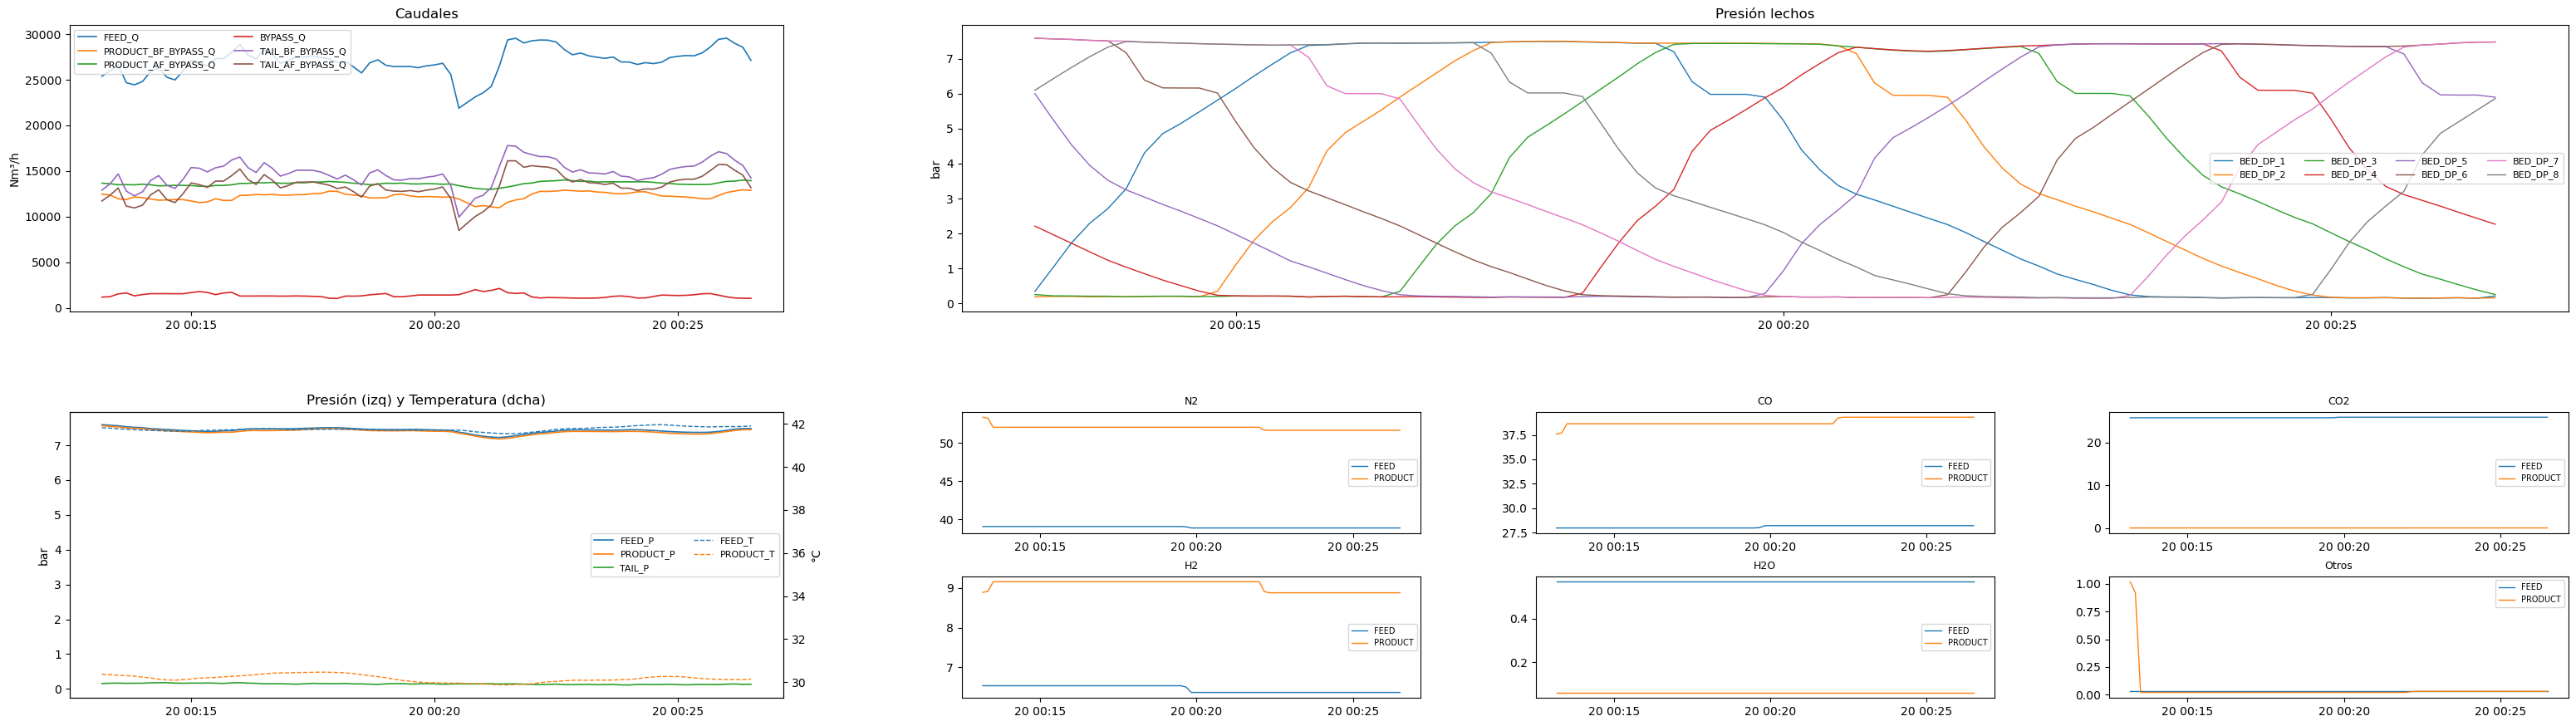

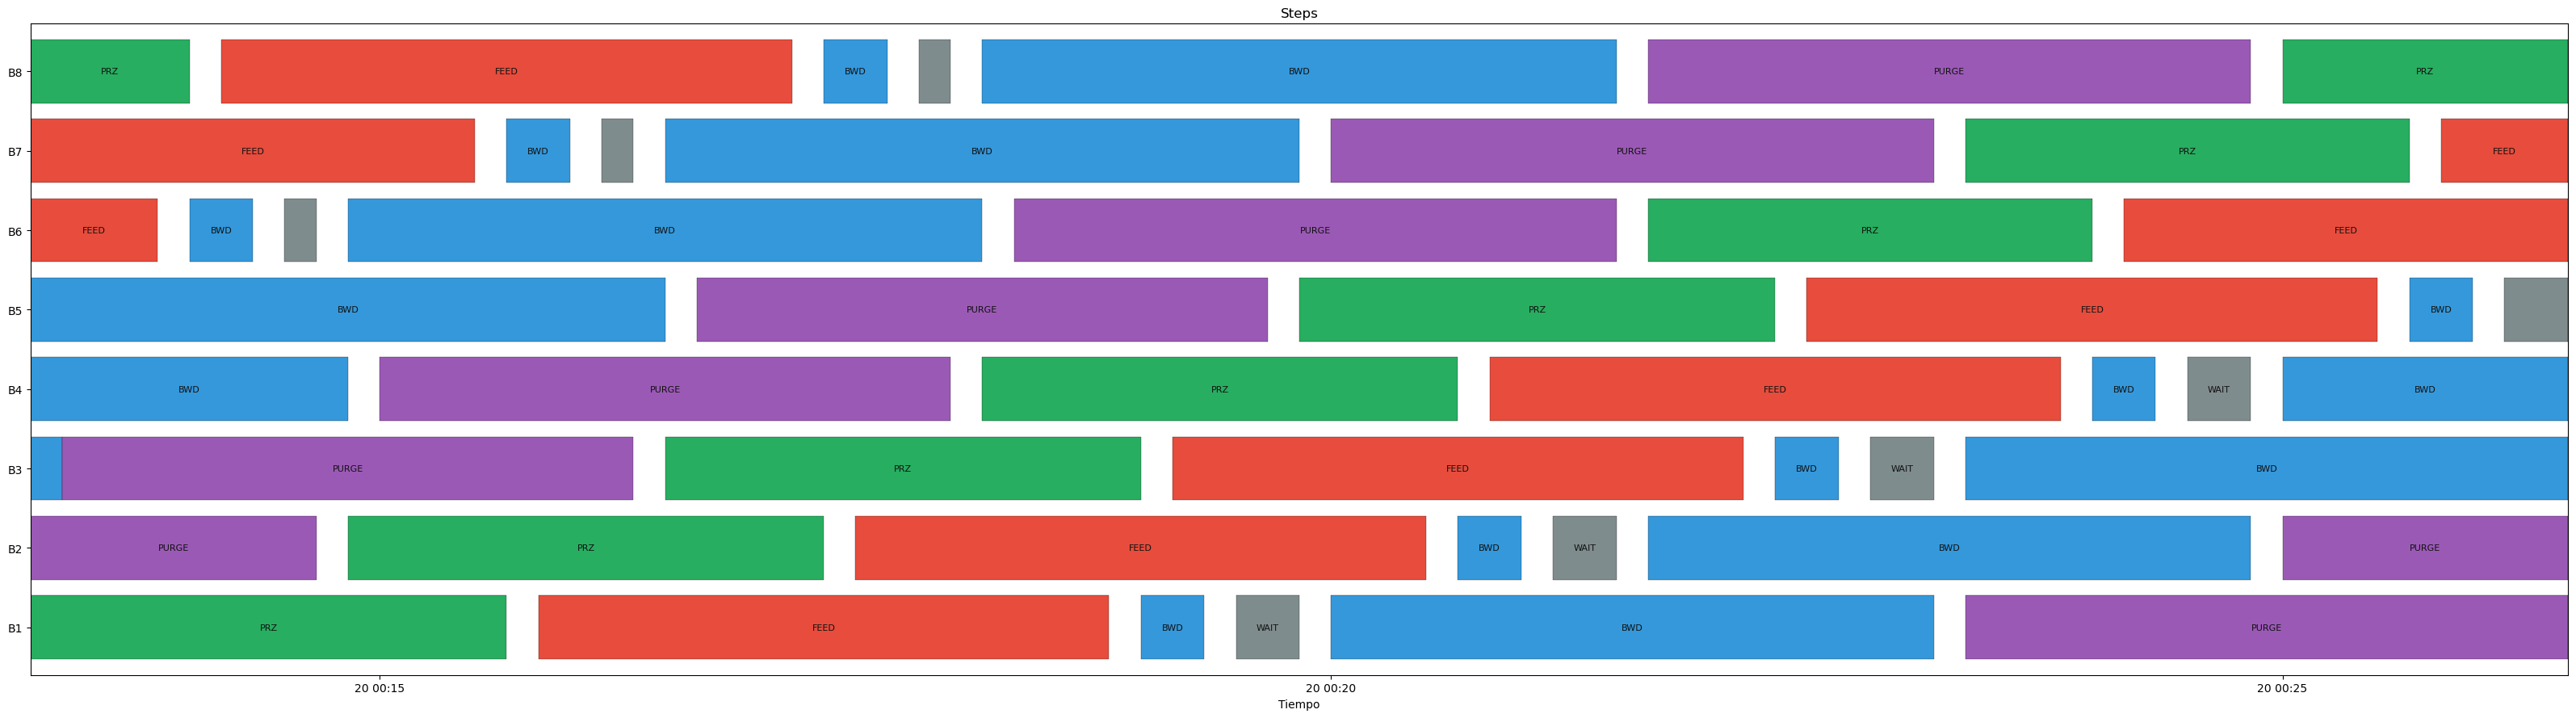

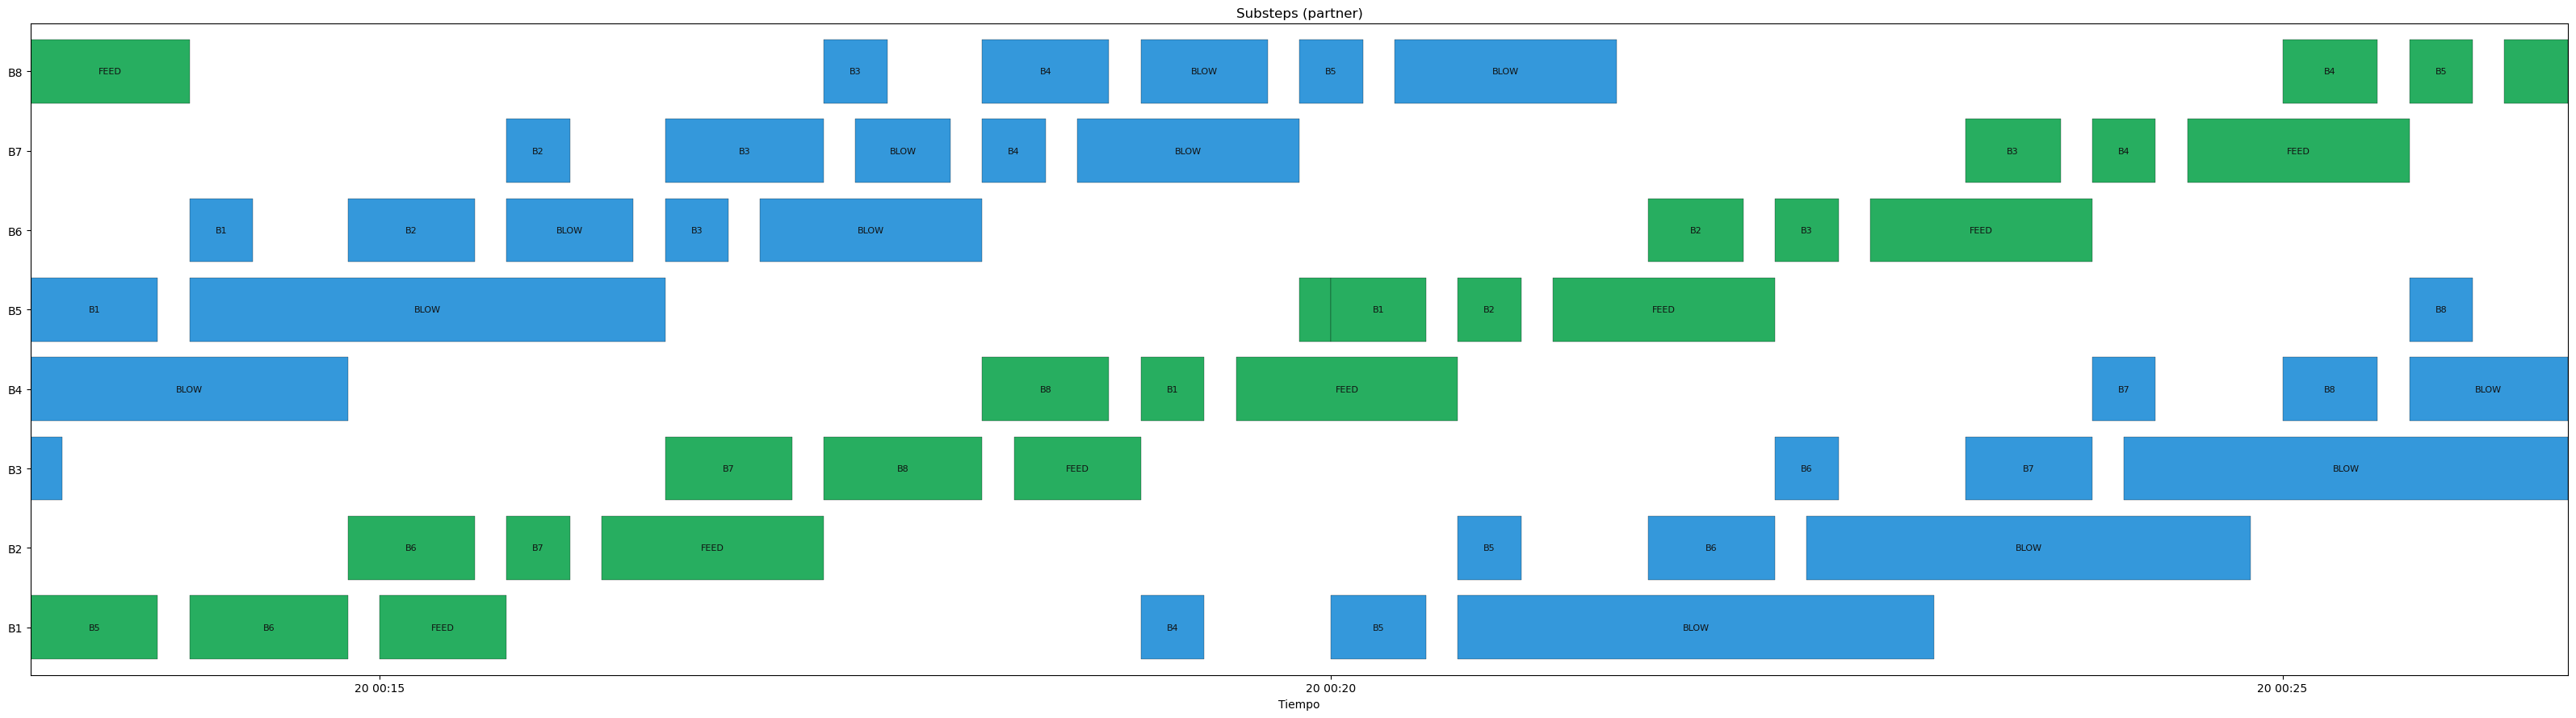

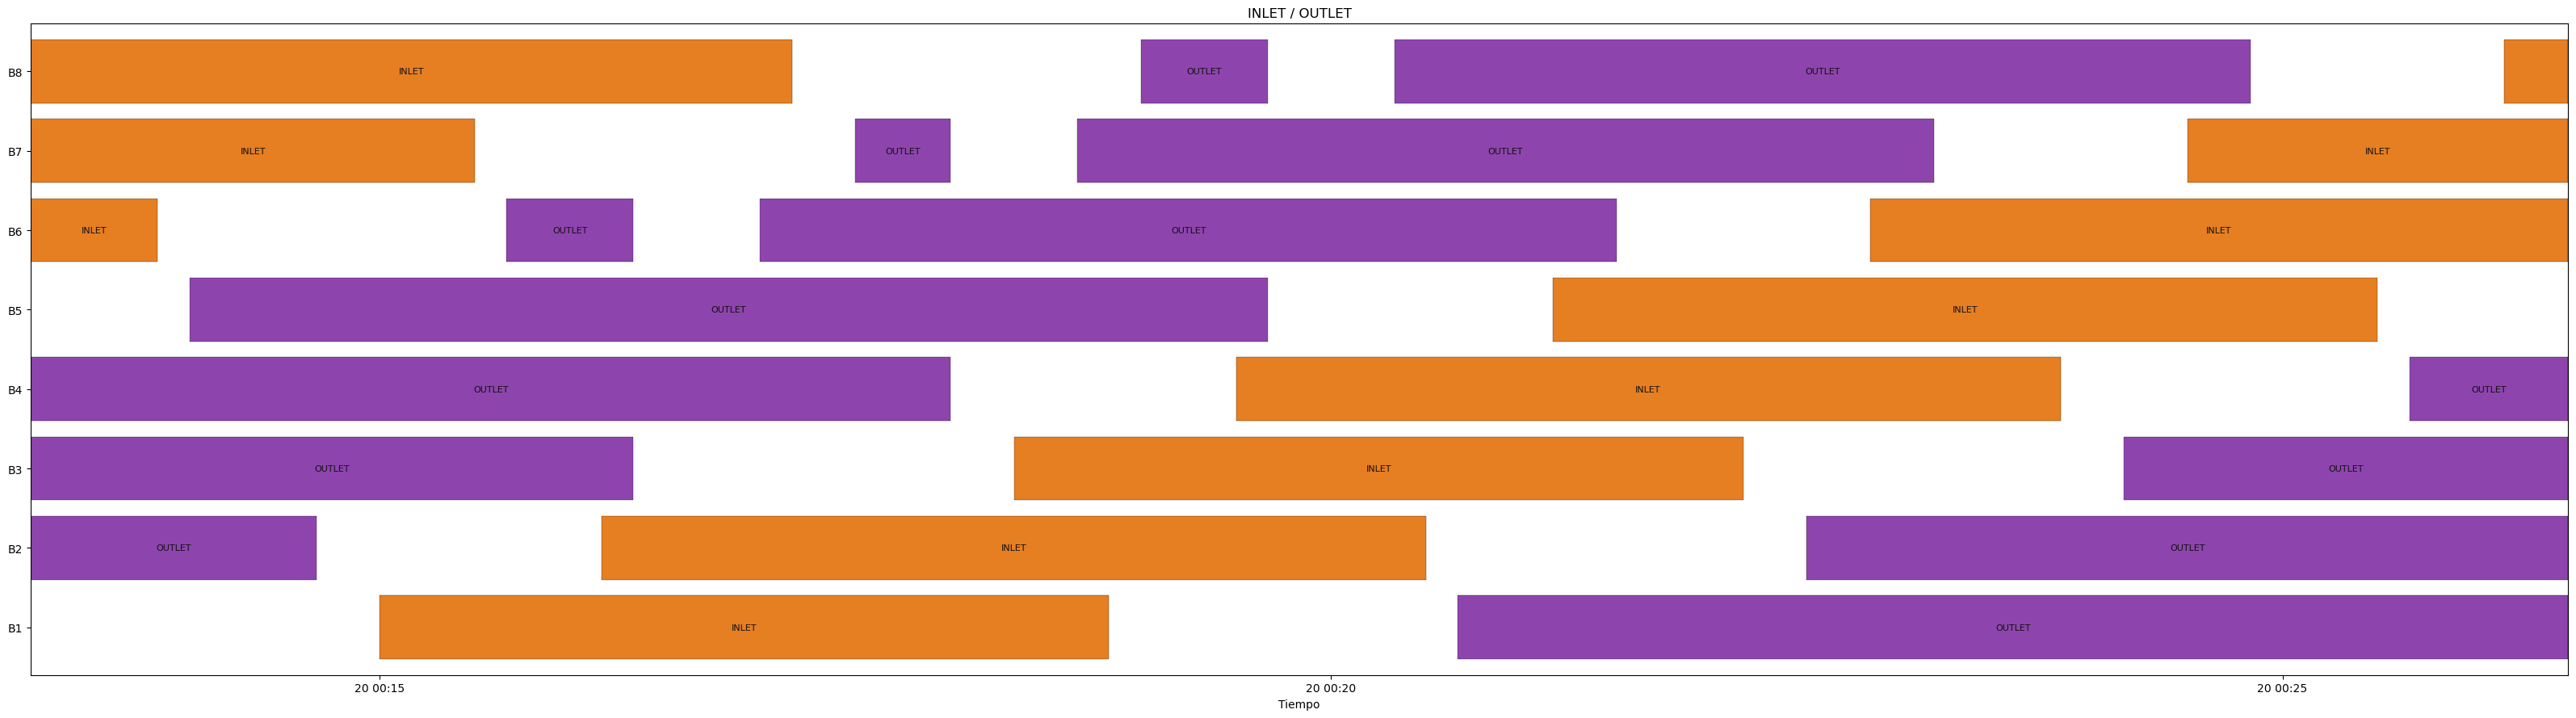

<Axes: title={'center': 'INLET / OUTLET'}, xlabel='Tiempo'>

In [10]:
t0 = "2025-04-20 00:13:03"   
t1 = "2025-04-20 00:26:39"  
monitorData(df,t0,t1)
plot_steps_gantt(df,t0,t1,mode='steps')
plot_steps_gantt(df,t0,t1,mode='substeps')
plot_steps_gantt(df,t0,t1,mode='inout')


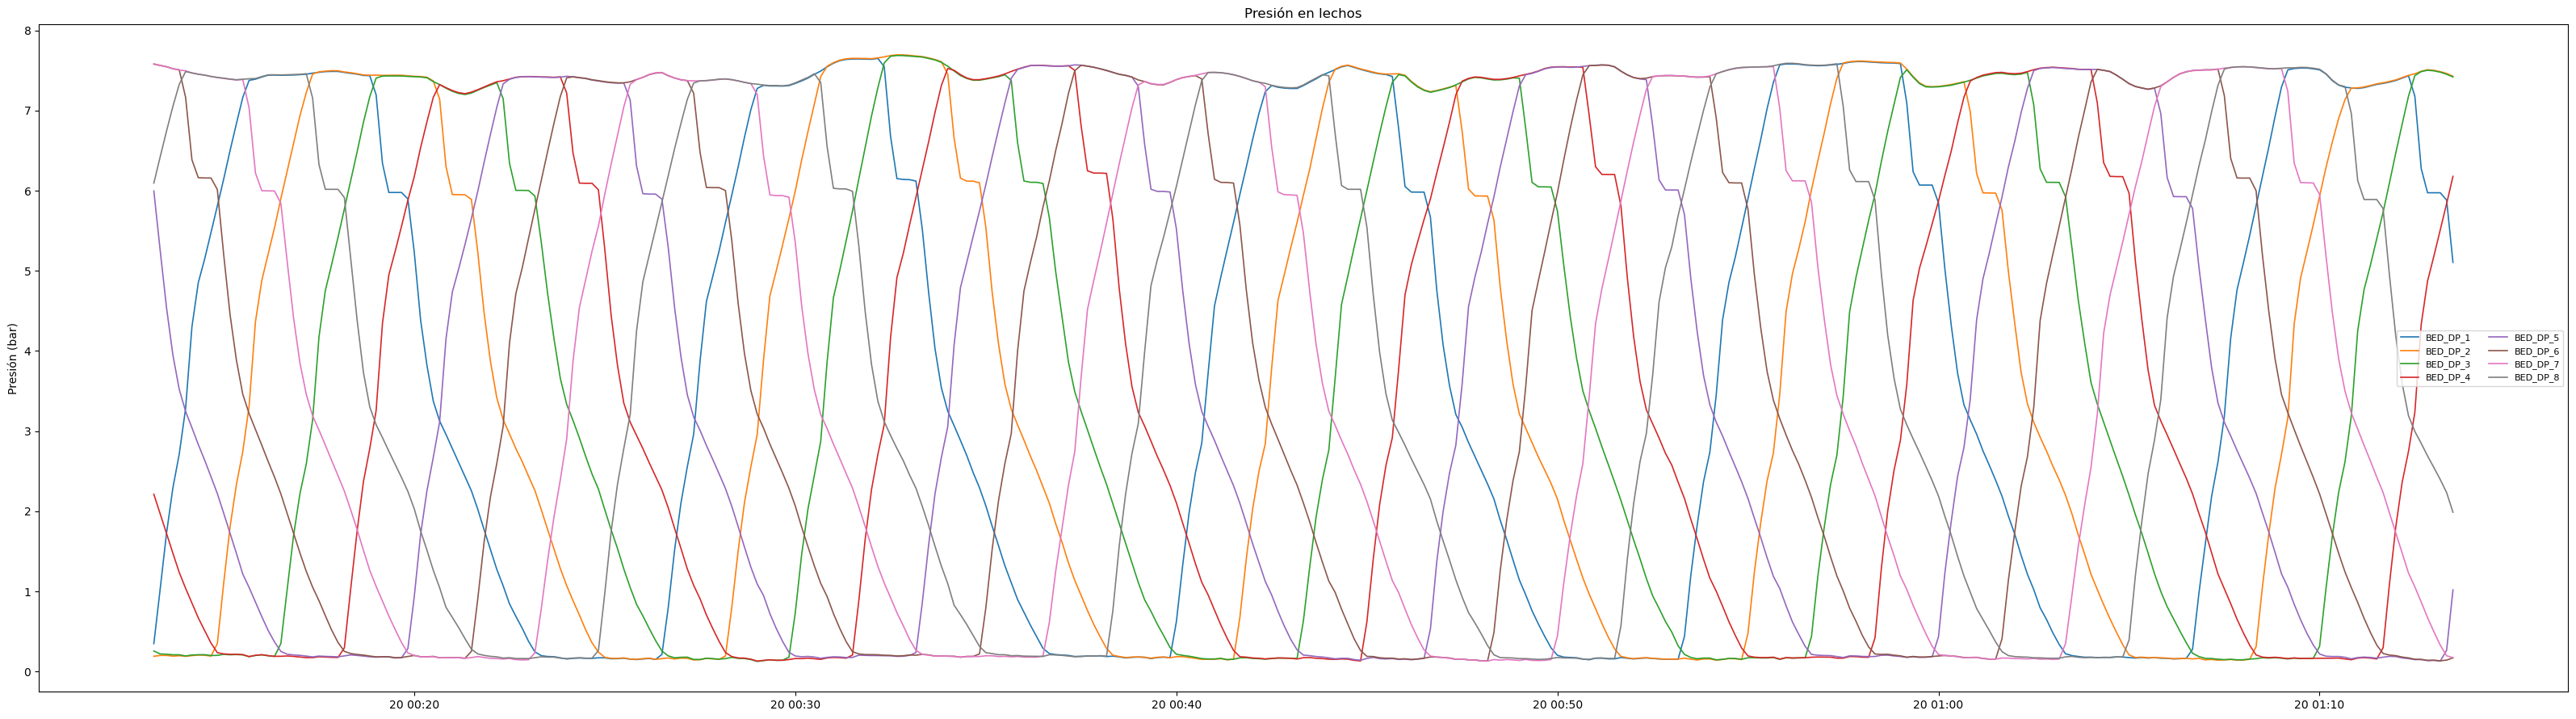

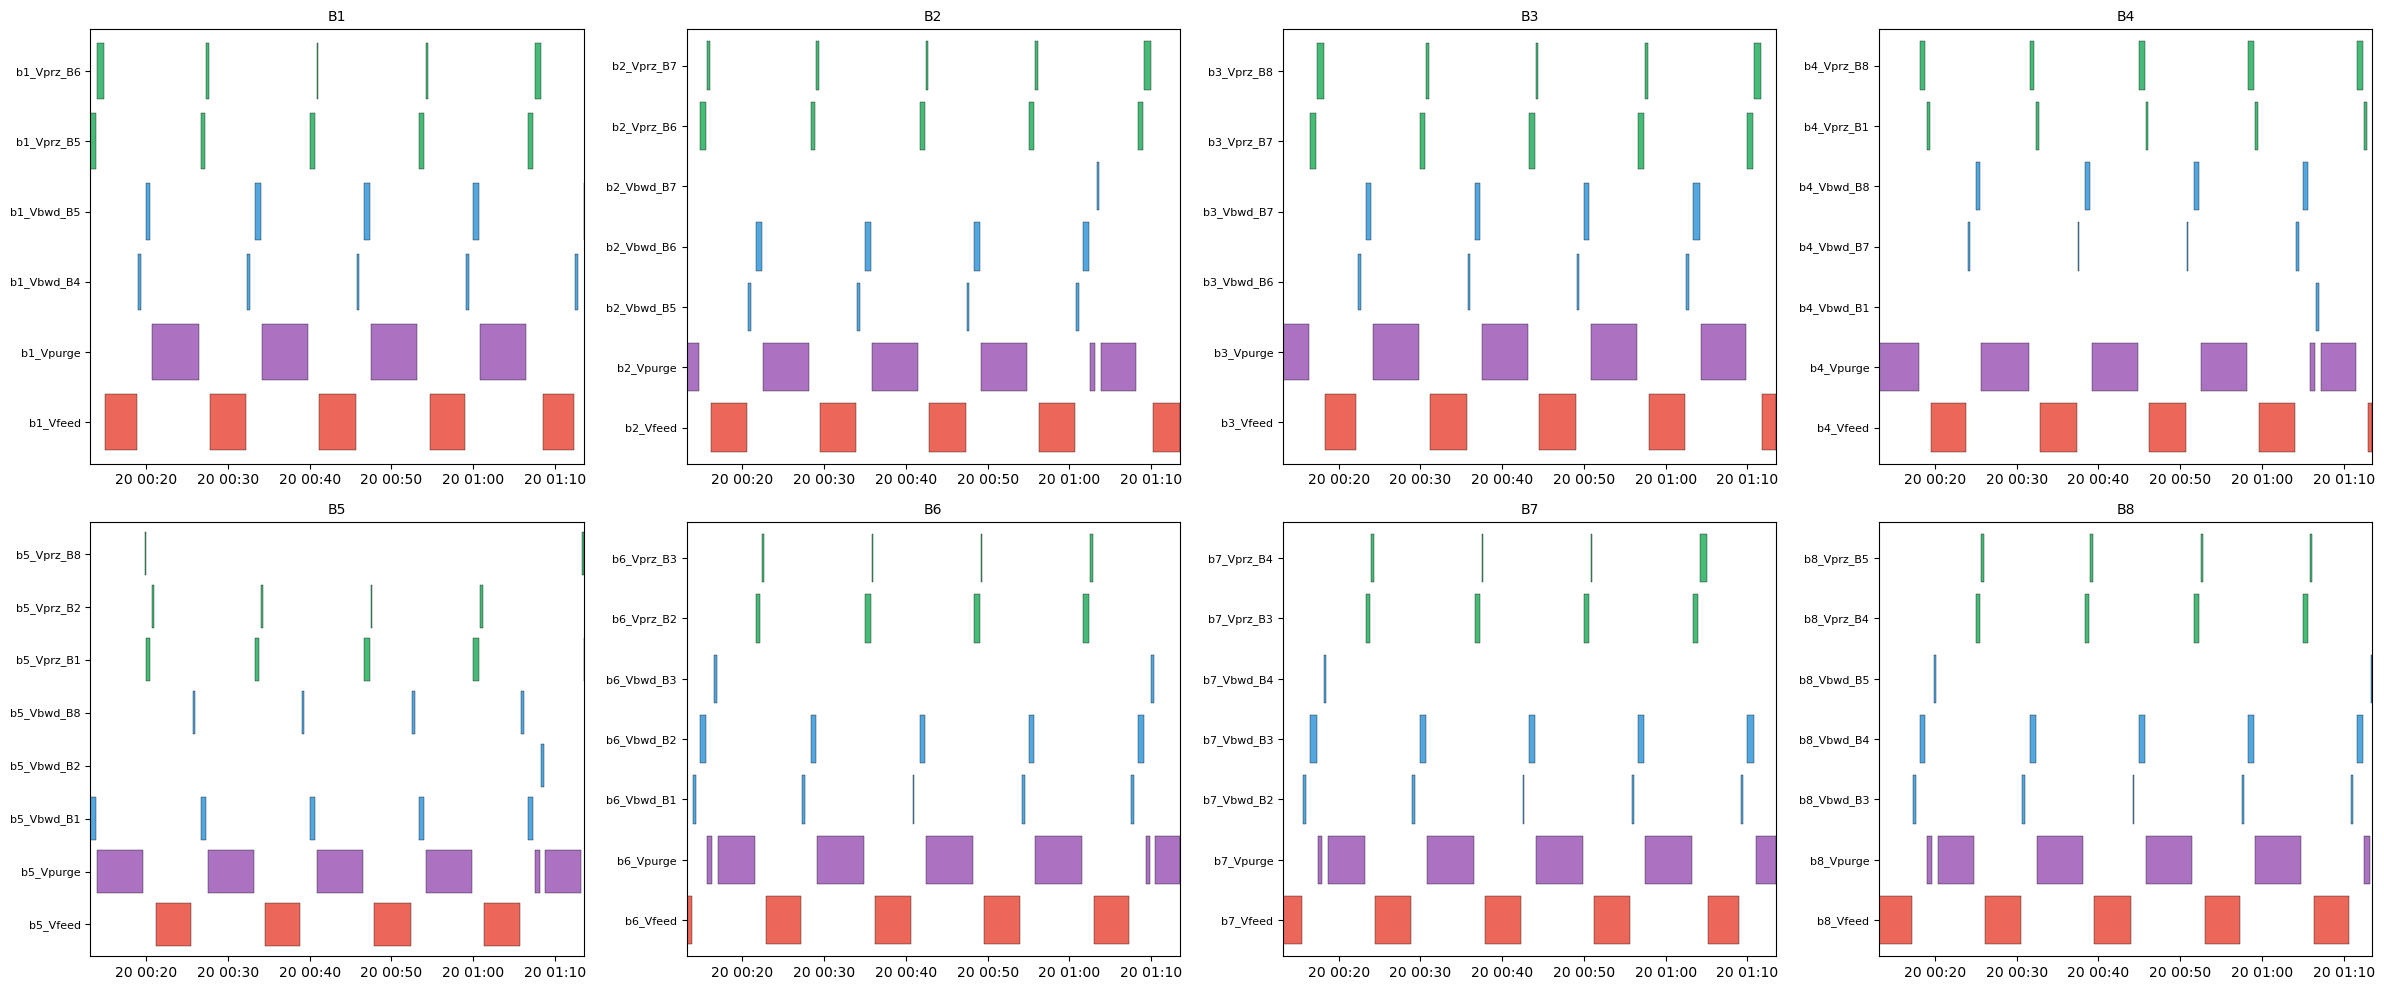

In [11]:
t0 = "2025-04-20 00:13:03"   
t1 = "2025-04-20 01:13:39"  
plot_raw_bed_pressure(df,t0,t1)
plot_valves_grid(df,t0,t1)

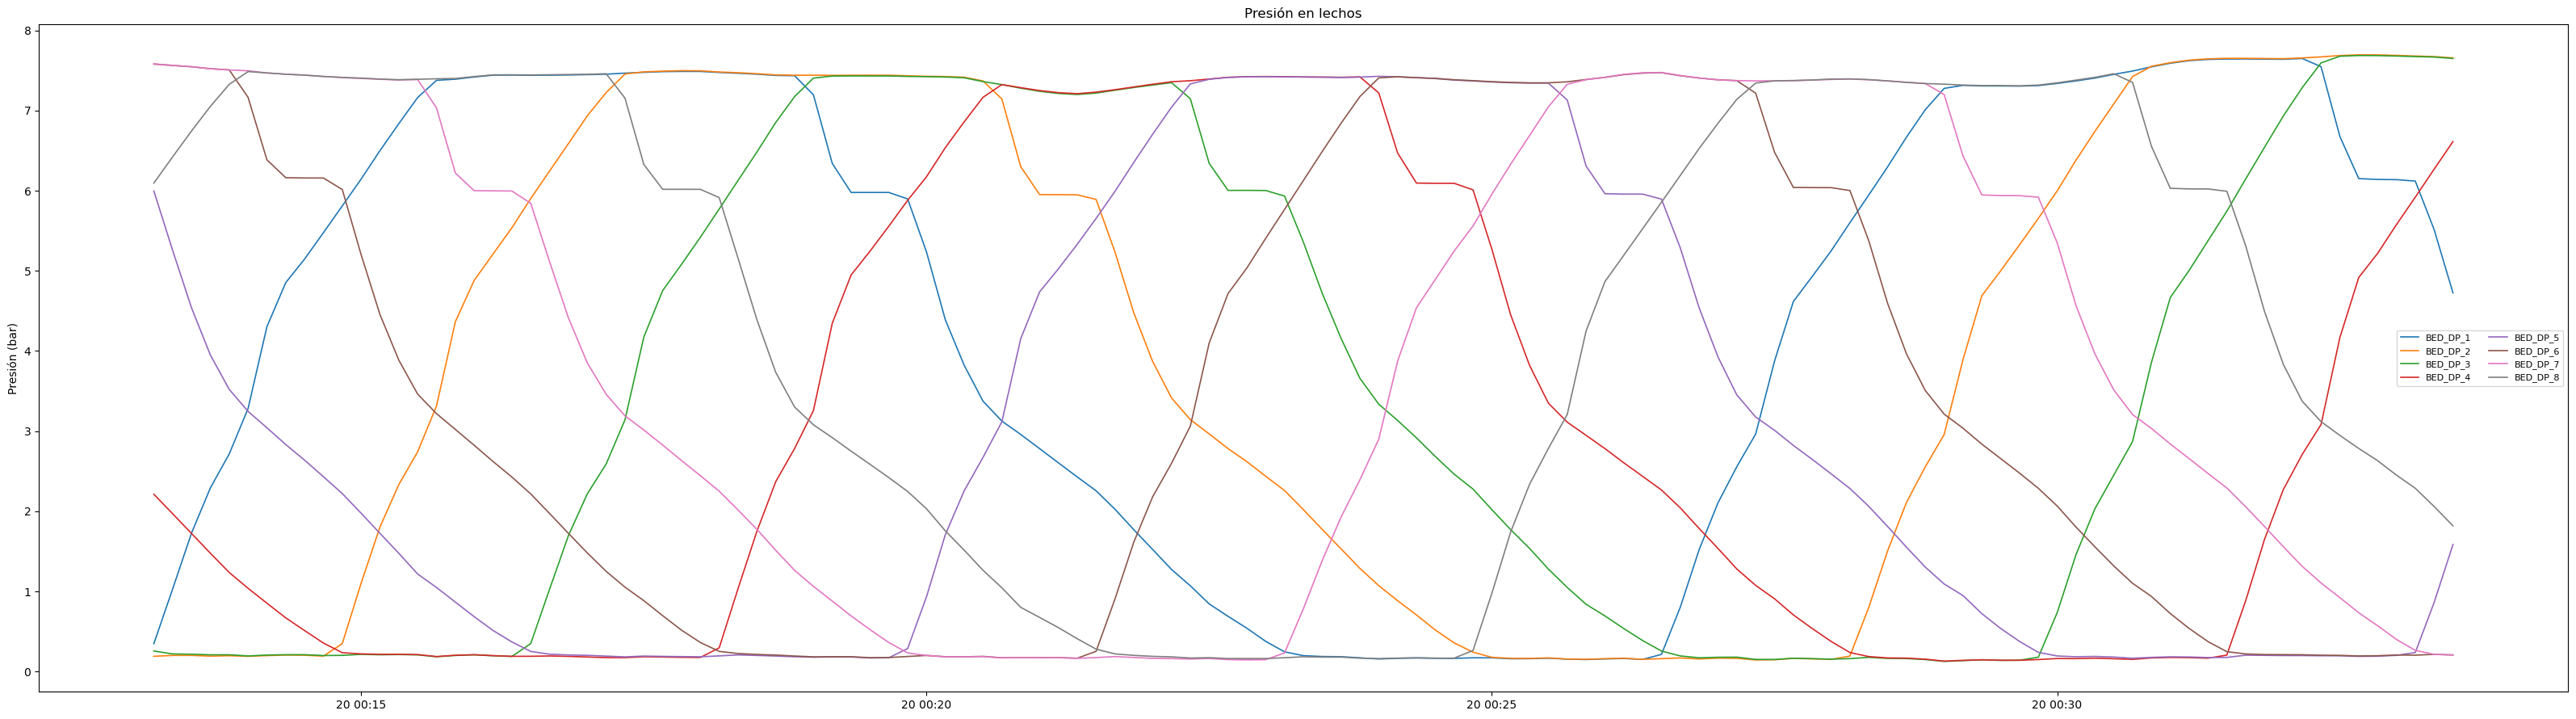

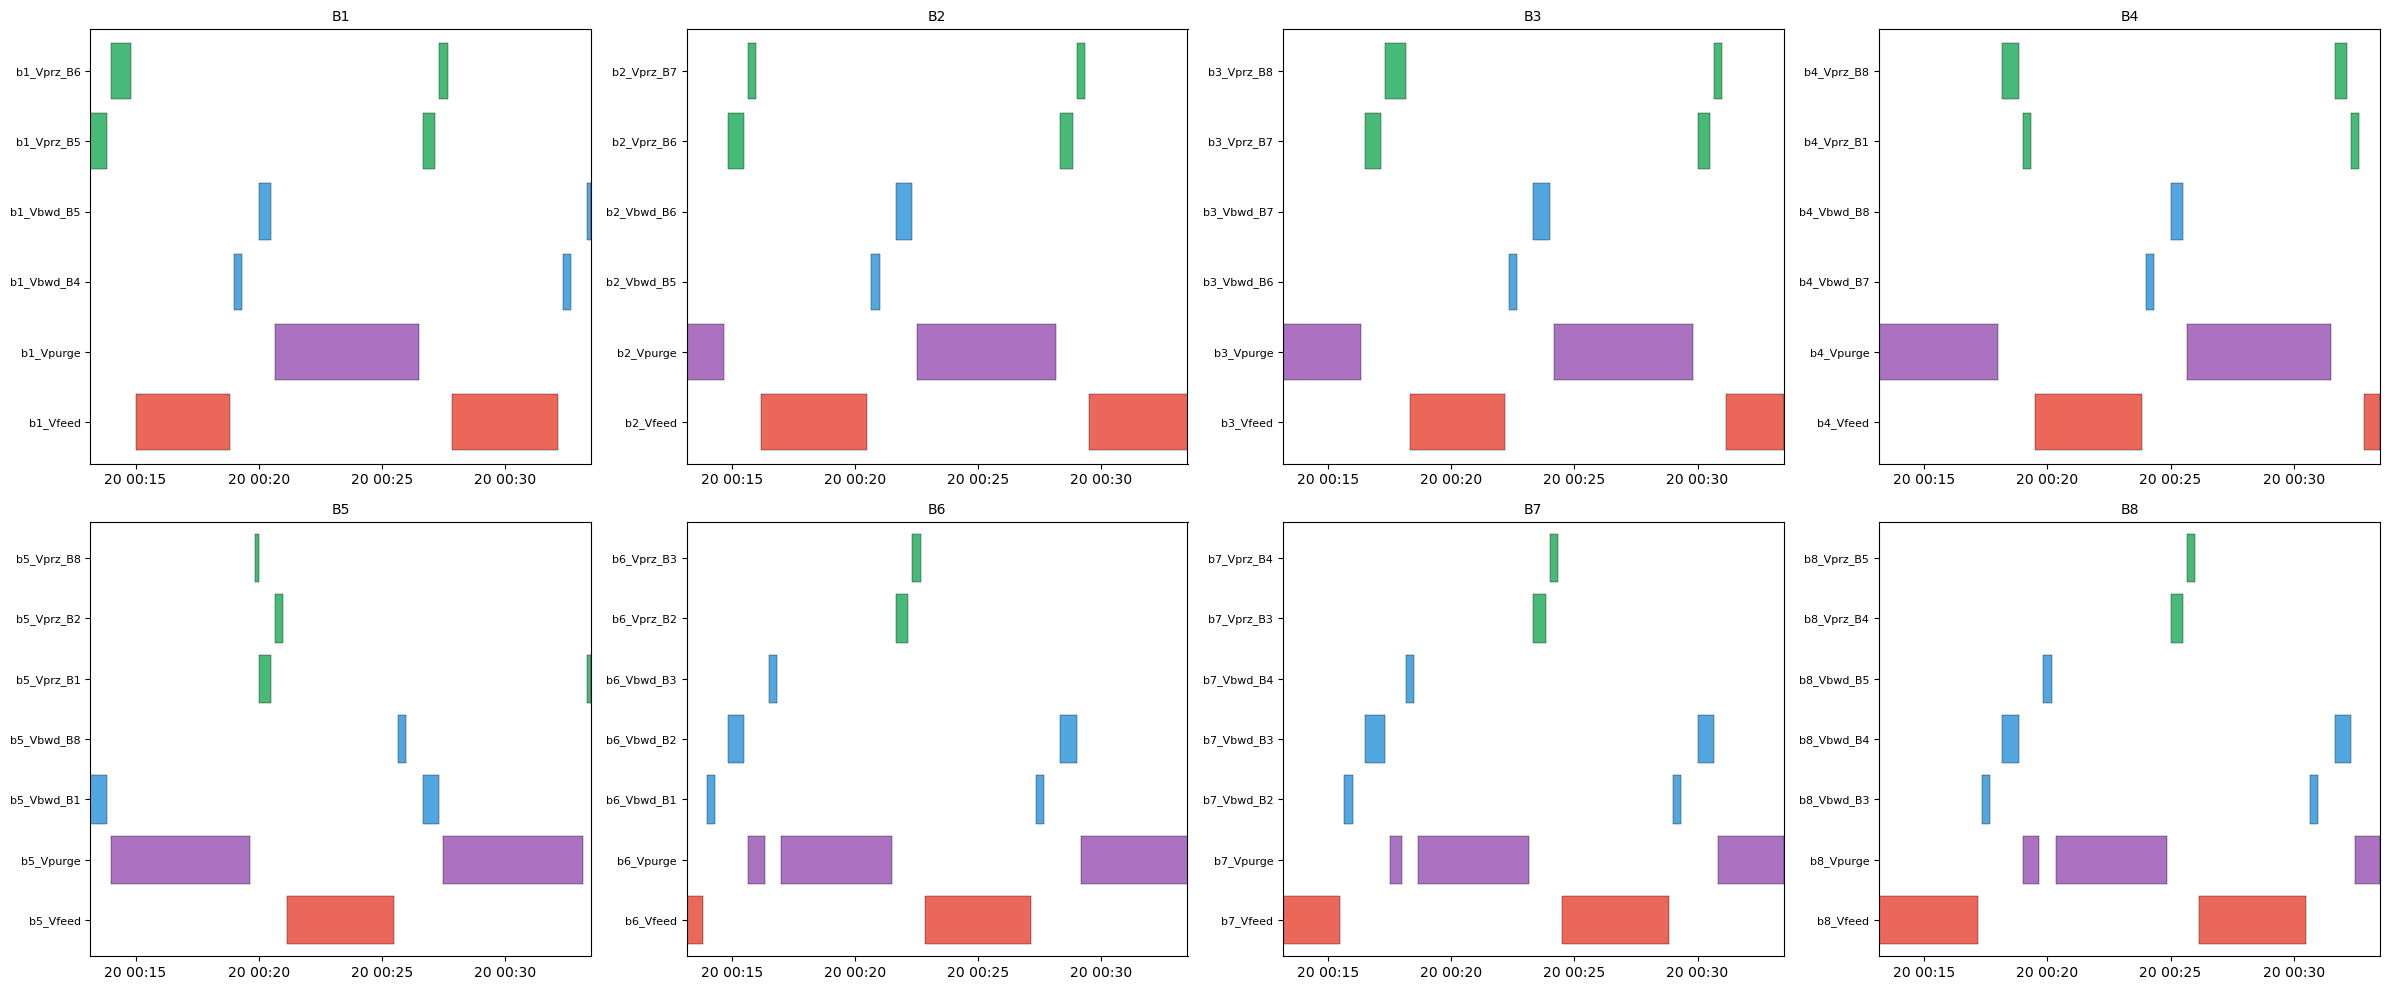

In [12]:
t0 = "2025-04-20 00:13:03"   
t1 = "2025-04-20 00:33:39"  
plot_raw_bed_pressure(df,t0,t1)
plot_valves_grid(df,t0,t1)

In [23]:
t0 = "2025-04-20 00:00:01"   
t1 = "2025-04-20 02:30:59"
flow=compute_flows(df,t0,t1,Vg)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


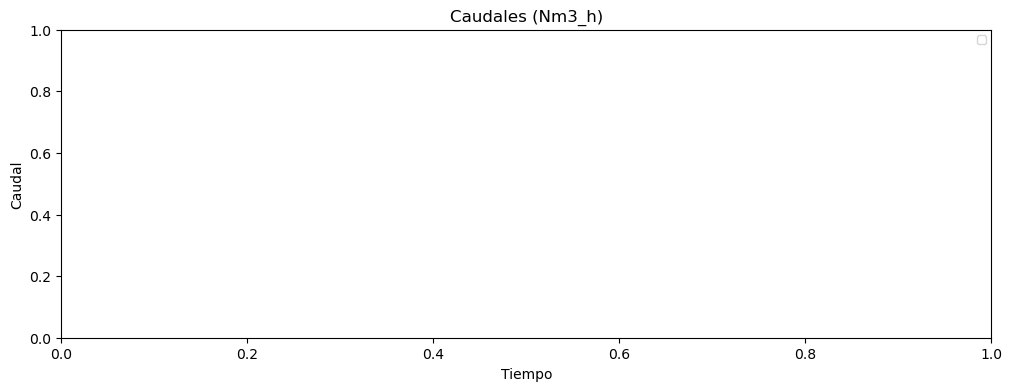

In [25]:
"""
def plot_flows(
    df: pd.DataFrame,
    start: str | None = None,
    end:   str | None = None,
    *,
    beds: str | list[str] = "all",        # "all" | "b1" | ["b1","b2",...]
    substeps: str | list[str] = "all",    # "all" | "PRZ_FEED" | ["PRZ_B2","BWD_PURGE","FEED_step"] | patrones con *
    units: str = "Nm3_h",                 # "Nm3_h" o "mol_h"
    aggregate_when_all_beds: bool = True, # si beds="all", sumar por tipo de substep
    width: float = 12.0,
    height: float = 4.0,
):
"""
plot_flows(flows,t0,t1,beds="all",substeps="all")